In [6]:
# now for each trajectory, take these image ranges, and create a folder for each instance id with rgb, depth, robot_pos
# plug each folder into the pipeline - where we pick GT frames do label prop and train

from shutil import copyfile, rmtree
import json
import os
import matplotlib.pyplot as plt
import cv2
        
def acopyjson(a, b, r, og_ctr):
    with open(a, "r") as f:
        dat = json.load(f)
        
    dat2 = {}
    
    if os.path.isfile(b):
        with open(b, "r") as f:
            dat2 = json.load(f)
    
    ctr = og_ctr
    for x in range(r[0], r[1]+1):
        dat2.update({ctr: dat[str(x)]})
        ctr += 1
        
    with open(b, "w") as fp:
        json.dump(dat2, fp)


def acopydir(a, b, ext, r, og_ctr):
#     print(f'acopydir {r}')
    if not os.path.isdir(b):
        os.makedirs(b) 
    ctr = og_ctr
    for x in range(r[0], r[1]+1):
        f = "{:05d}{}".format(x, ext)
#         print(f)
        copyfile(os.path.join(a,f), os.path.join(b,"{:05d}{}".format(ctr, ext)))
        ctr += 1
    

data_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019'
out_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection_ids_allinone_auto'

# Instance IDs we care about [193,404,196,172,243,133,129,170]

# traj_ranges = {
#     2: [(0,31), (32,41), (69,78), (207,234), (365,389), (466,589)],
#     3: [(115,173), (189,237), (334,397), (398,419)],
#     4: [(387,447), (532,558)],
#     5: [(27,60), (77,93), (149,209), (210,234), (249,272), (317,409), (671,704)],
# }

def get_maximal_relevant_id(x, traj_path):
    image_id = int(x.split('.')[0])
#     print(f'image_id {image_id}')
    
    seg = os.path.join(traj_path, 'seg')
    prop_path = os.path.join(seg, "{:05d}.npy".format(image_id))
    annot = np.load(prop_path).astype(np.uint32)
    
    ans = -1
    maxarea = 0
    for x in np.unique(annot):
        if x in ids_we_care_about:
            binary_mask = (annot == x).astype(np.int32)
            area = binary_mask.sum()
            if area > maxarea:
                maxarea = area
                ans = x
    return ans
    

ids_we_care_about = [404,196,172,243,133,129,170]

ctr = 0

if os.path.isdir(out_dir):
    rmtree(out_dir)
os.makedirs(out_dir)

traj = 1

traj_path 

for traj, ranges in traj_ranges.items():
    print(traj, ranges)
    traj_dir = os.path.join(data_dir, str(traj), 'activeonly')
    for i in range(len(ranges)):
#         print(f'copying instance det {i} to {traj_out}')
        # copy rgb, seg, depth and data.json
        acopydir(os.path.join(traj_dir, 'rgb'), os.path.join(traj_out, 'rgb'), '.jpg', ranges[i], ctr)
        acopydir(os.path.join(traj_dir, 'depth'), os.path.join(traj_out, 'depth'), '.npy', ranges[i], ctr)
        acopydir(os.path.join(traj_dir, 'seg'), os.path.join(traj_out, 'seg'), '.npy', ranges[i], ctr)
        acopyjson(os.path.join(traj_dir, 'data.json'), os.path.join(traj_out, 'data.json'), ranges[i], ctr)
        
        ctr = len(os.listdir(os.path.join(traj_out, 'rgb')))

2 [(0, 31), (32, 41), (69, 78), (207, 234), (365, 389), (466, 589)]
ctr after acopydir 0
ctr after acopydir 32
ctr after acopydir 42
ctr after acopydir 52
ctr after acopydir 80
ctr after acopydir 105
3 [(115, 173), (189, 237), (334, 397), (398, 419)]
ctr after acopydir 229
ctr after acopydir 288
ctr after acopydir 337
ctr after acopydir 401
4 [(387, 447), (532, 558)]
ctr after acopydir 423
ctr after acopydir 484
5 [(27, 60), (77, 93), (149, 209), (210, 234), (249, 272), (317, 409), (671, 704)]
ctr after acopydir 511
ctr after acopydir 545
ctr after acopydir 562
ctr after acopydir 623
ctr after acopydir 648
ctr after acopydir 672
ctr after acopydir 765


879 in /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_detection_ids_allinone


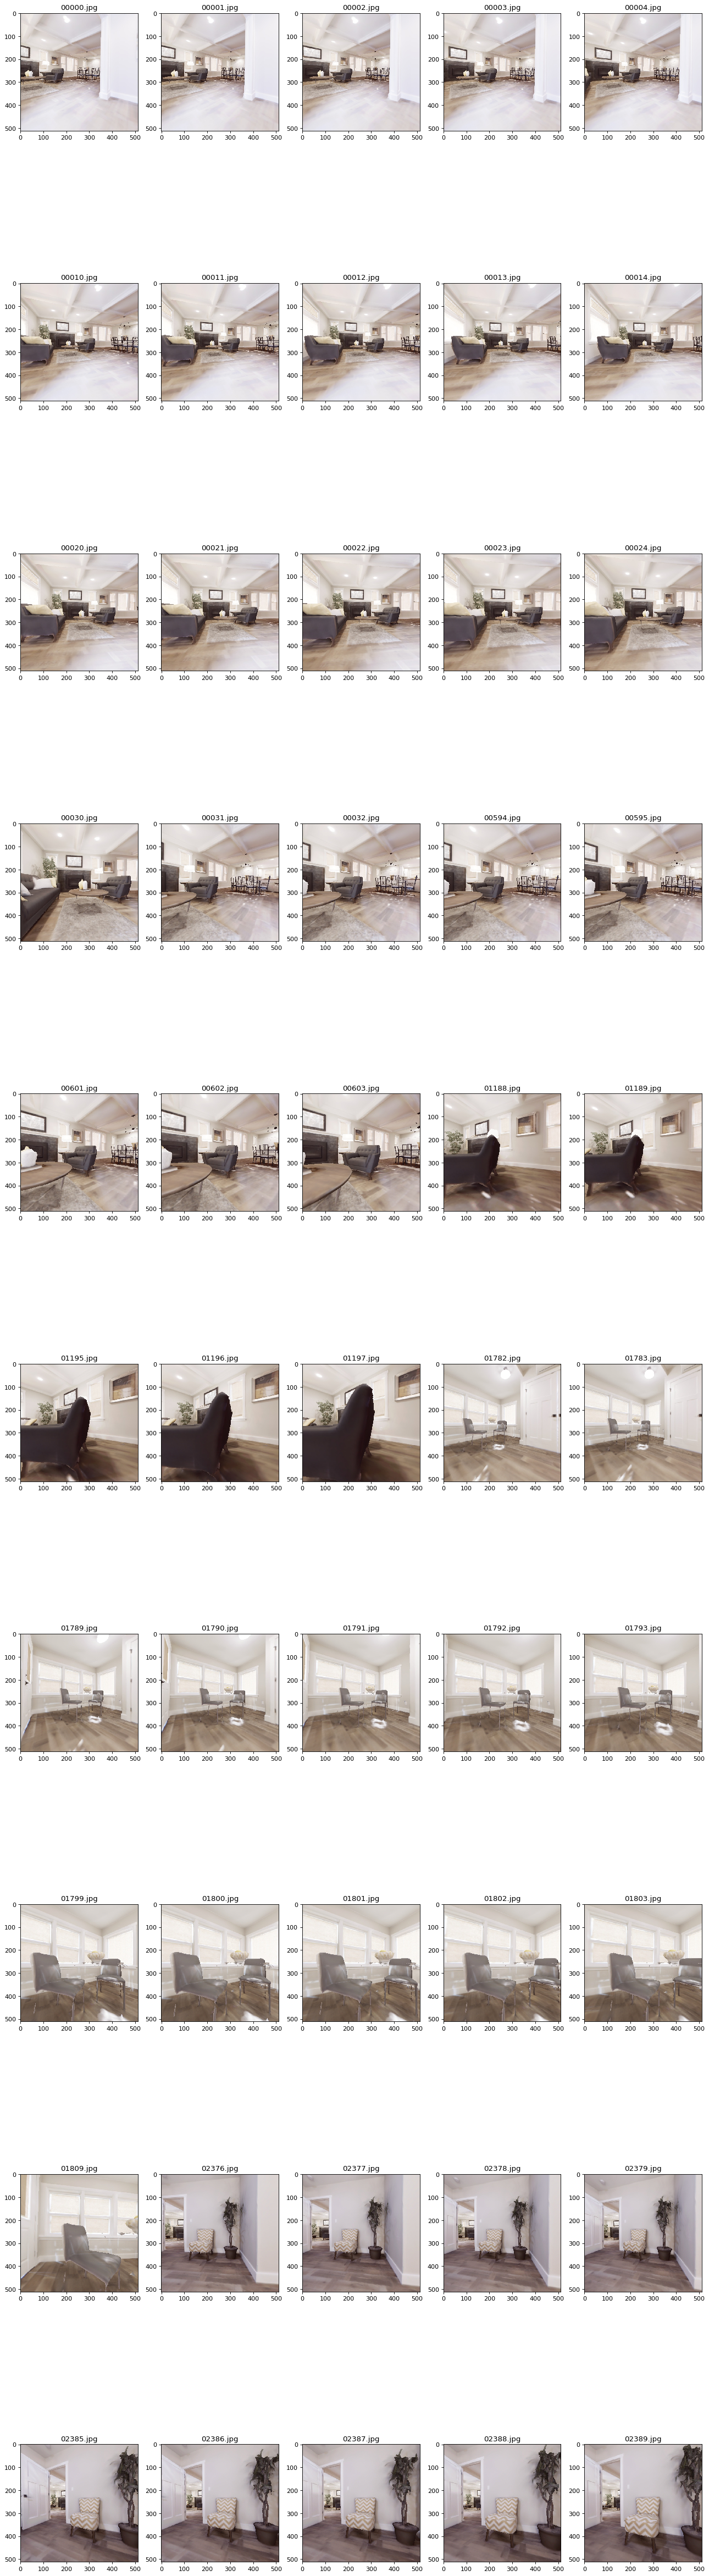

In [9]:
        
# view 50 images from traj_out
fig, axs = plt.subplots(10, 5, figsize=(20,80), dpi=80)
imgs = os.listdir(os.path.join(traj_out, 'rgb'))
print(f'{len(imgs)} in {traj_out}')
for r in range(10):
    for c in range(5):
        x = r*10 + c
        axs[r,c].imshow(cv2.cvtColor(cv2.imread(os.path.join(traj_out, 'rgb', imgs[x])), cv2.COLOR_BGR2RGB))
        axs[r,c].set_title(imgs[x])
plt.show()
        